In [1]:
from pandas import read_csv, DataFrame
from numpy import ndarray
from matplotlib.pyplot import figure, show, savefig
from sklearn.model_selection import train_test_split

from dslab_functions import get_variable_types, run_NB, run_KNN, CLASS_EVAL_METRICS, plot_multibar_chart

def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] | None = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] | None = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval

# read file
filename = "class_pos_covid.csv"
file_tag = "class_pos_covid"
data : DataFrame = read_csv('class_pos_covid.csv')
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
3,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,NaN,Yes,...,1.80,84.82,26.08,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [2]:
# cleaning
columns = ['ID']
existing_columns = [col for col in columns if col in data.columns]
if len(existing_columns) > 0:
    data.drop(columns = existing_columns, inplace = True)

vars: dict[str, list] = get_variable_types(data)
for v in vars["symbolic"]:
    print(v, data[v].unique())

og_num_vars = vars["numeric"]
og_sym_vars = vars["symbolic"]
print(og_num_vars)

State ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
GeneralHealth ['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]
LastCheckupTime ['Within past year (anytime less than 12 months ago)' nan
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago)'
 '5 or more years ago']
RemovedTeeth [nan 'None of them' '1 to 5' '6 or more, but not all' 'Al

# VARIABLE ENCODING

- ID: drop
- Binary vars: ole              
- State: oebt			
- GeneralHealth: ole						
- LastCheckUpTime: ole					
- SmokerStatus:	ole					
- ECigaretteUsage: ole					
- RaceEthnicityCategory: ole						
- AgeCategory: ole			
- TetanusLast10Tdap: ole

haddiabetes and removedteeth missing from forms!

### BINARY

In [3]:
# encode binary
yes_no: dict[str, int] = {"no": 0, "No": 0, "yes": 1, "Yes": 1}
fem_male: dict[str, int] = {"female": 0, "Female": 0, "male": 1, "Male": 1}

encoding: dict[str, dict[str, int]] = {
    "CovidPos": yes_no,
    "PhysicalActivities": yes_no,
    "HadHeartAttack": yes_no,
    "HadAngina": yes_no,
    "HadStroke": yes_no,
    "HadAsthma": yes_no,
    "HadSkinCancer": yes_no,
    "HadCOPD": yes_no,
    "HadDepressiveDisorder": yes_no,
    "HadKidneyDisease": yes_no,
    "HadArthritis": yes_no,
    "DeafOrHardOfHearing": yes_no,
    "BlindOrVisionDifficulty": yes_no,
    "DifficultyConcentrating": yes_no,
    "DifficultyWalking": yes_no,
    "DifficultyDressingBathing": yes_no,
    "DifficultyErrands": yes_no,
    "ChestScan": yes_no,
    "AlcoholDrinkers": yes_no,
    "HIVTesting": yes_no,
    "FluVaxLast12": yes_no,
    "PneumoVaxEver": yes_no,
    "HighRiskLastYear": yes_no,
    "Sex": fem_male,
}

### SYMBOLIC

In [4]:
#encode symbolic
state_gdp: dict[str, float] = {
    'Alabama': 54.753,
    'Alaska': 86.722,
    'Arizona': 62.365,
    'Arkansas': 54.259,
    'California': 92.190,
    'Colorado': 82.954,
    'Connecticut': 88.760,
    'Delaware': 85.977,
    'District of Columbia': 242.853,
    'Florida': 62.446,
    'Georgia': 69.253,
    'Hawaii': 68.207,
    'Idaho': 56.496,
    'Illinois': 82.126,
    'Indiana': 66.698,
    'Iowa': 72.221,
    'Kansas': 71.729,
    'Kentucky': 57.653,
    'Louisiana': 61.313,
    'Maine': 61.008,
    'Maryland': 76.279,
    'Massachusetts': 98.609,
    'Michigan': 61.859,
    'Minnesota': 78.100,
    'Mississippi': 47.190,
    'Missouri': 63.126,
    'Montana': 57.945,
    'Nebraska': 82.207,
    'Nevada': 67.962,
    'New Hampshire': 75.565,
    'New Jersey': 80.490,
    'New Mexico': 57.792,
    'New York': 104.344,
    'North Carolina': 68.243,
    'North Dakota': 94.021,
    'Ohio': 69.978,
    'Oklahoma': 59.894,
    'Oregon': 70.548,
    'Pennsylvania': 71.160,
    'Rhode Island': 65.362,
    'South Carolina': 56.066,
    'South Dakota': 74.268,
    'Tennessee': 67.473,
    'Texas': 78.456,
    'Utah': 73.424,
    'Vermont': 62.771,
    'Virginia': 74.789,
    'Washington': 93.193,
    'West Virginia': 53.852,
    'Wisconsin': 68.192,
    'Wyoming': 81.586,
    'Guam': 34.624,
    'Puerto Rico': 31.429,
    'Virgin Islands': 39.552
}
encoding["State"] = state_gdp

def apply_encoding(df: DataFrame):
    df['GeneralHealth'] = df.apply(lambda x: 1 if x["GeneralHealth"] == "Poor"
                               else 2 if x["GeneralHealth"] == "Fair"
                               else 3 if x["GeneralHealth"] == "Good"
                               else 4 if x["GeneralHealth"] == "Very good"
                               else 5 if x["GeneralHealth"] == "Excellent"
                               else None, axis=1)

    df['LastCheckupTime'] = df.apply(lambda x: 4 if x["LastCheckupTime"] == "Within past year (anytime less than 12 months ago)"
                                else 3 if x["LastCheckupTime"] == "Within past 2 years (1 year but less than 2 years ago)"
                                else 2 if x["LastCheckupTime"] == "Within past 5 years (2 years but less than 5 years ago)"
                                else 1 if x["LastCheckupTime"] == "5 or more years ago"
                                else None, axis=1)

    df['RemovedTeeth'] = df.apply(lambda x: 4 if x["RemovedTeeth"] == "None of them"
                                else 3 if x["RemovedTeeth"] == "1 to 5"
                                else 2 if x["RemovedTeeth"] == "6 or more, but not all"
                                else 1 if x["RemovedTeeth"] == "All"
                                else None, axis=1)

    df['HadDiabetes'] = df.apply(lambda x: 4 if x["HadDiabetes"] == "No"
                                else 3 if x["HadDiabetes"] == "No, pre-diabetes or borderline diabetes"
                                else 2 if x["HadDiabetes"] == "Yes, but only during pregnancy (female)"
                                else 1 if x["HadDiabetes"] == "Yes"
                                else None, axis=1)

    df['SmokerStatus'] = df.apply(lambda x: 4 if x["SmokerStatus"] == "Never smoked"
                                else 3 if x["SmokerStatus"] == "Former smoker"
                                else 2 if x["SmokerStatus"] == "Current smoker - now smokes some days"
                                else 1 if x["SmokerStatus"] == "Current smoker - now smokes every day"
                                else None, axis=1)

    df['ECigaretteUsage'] = df.apply(lambda x: 4 if x["ECigaretteUsage"] == "Never used e-cigarettes in my entire life"
                                else 3 if x["ECigaretteUsage"] == "Not at all (right now)"
                                else 2 if x["ECigaretteUsage"] == "Use them some days"
                                else 1 if x["ECigaretteUsage"] == "Use them every day"
                                else None, axis=1)

    df['RaceEthnicityCategory'] = df.apply(lambda x: 0 if x["RaceEthnicityCategory"] == "Hispanic"
                                else 1 if x["RaceEthnicityCategory"] == "White only, Non-Hispanic"
                                else 2 if x["RaceEthnicityCategory"] == "Black only, Non-Hispanic"
                                else 3 if x["RaceEthnicityCategory"] == "Multiracial, Non-Hispanic"
                                else 4 if x["RaceEthnicityCategory"] == "Other race only, Non-Hispanic"
                                else None, axis=1)

    df['AgeCategory'] = df.apply(lambda x: 1 if x["AgeCategory"] == "Age 18 to 24"
                                else 2 if x["AgeCategory"] == "Age 25 to 29"
                                else 3 if x["AgeCategory"] == "Age 30 to 34"
                                else 4 if x["AgeCategory"] == "Age 35 to 39"
                                else 5 if x["AgeCategory"] == "Age 40 to 44"
                                else 6 if x["AgeCategory"] == "Age 45 to 49"
                                else 7 if x["AgeCategory"] == "Age 50 to 54"
                                else 8 if x["AgeCategory"] == "Age 55 to 59"
                                else 9 if x["AgeCategory"] == "Age 60 to 64"
                                else 10 if x["AgeCategory"] == "Age 65 to 69"
                                else 11 if x["AgeCategory"] == "Age 70 to 74"
                                else 12 if x["AgeCategory"] == "Age 75 to 79"
                                else 13 if x["AgeCategory"] == "Age 80 or older"
                                else None, axis=1)
    if 'TetanusLast10Tdap' in df.columns:
        df['TetanusLast10Tdap'] = df.apply(lambda x: 0 if x["TetanusLast10Tdap"] == "No, did not receive any tetanus shot in the past 10 years"
                                else 1 if x["TetanusLast10Tdap"] == "Yes, received tetanus shot but not sure what type"
                                else 2 if x["TetanusLast10Tdap"] == "Yes, received tetanus shot, but not Tdap"
                                else 3 if x["TetanusLast10Tdap"] == "Yes, received Tdap"
                                else None, axis=1)

# MISSING VALUES IMPUTATION

Dataset nr records=380932 nr variables=40


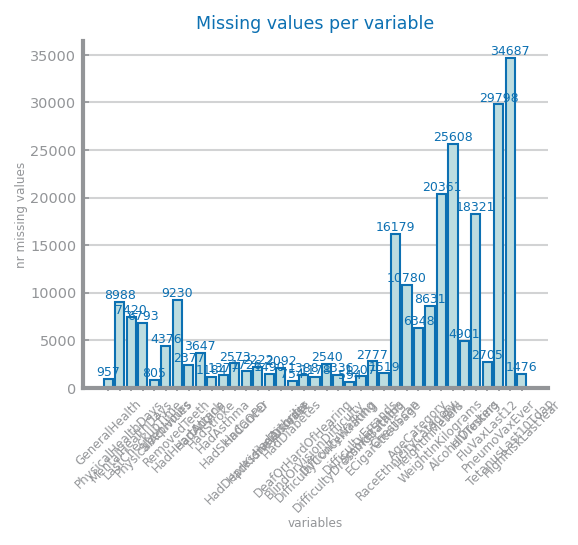

In [5]:
from dslab_functions import mvi_by_dropping, mvi_by_filling
from dslab_functions import plot_bar_chart

print(f"Dataset nr records={data.shape[0]}", f"nr variables={data.shape[1]}")

mv: dict[str, int] = {}
figure()
for var in data:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
show()

### MVI FIRST APPROACH - dropping variables with >5% mv and records with >30% mv then imputing with median

In [6]:
df: DataFrame = mvi_by_dropping(data, min_pct_per_variable=0.95, min_pct_per_record=0.7)
print(df.shape)

df: DataFrame = mvi_by_filling(df, strategy="frequent")
df.head()

(380721, 36)


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,State,GeneralHealth,LastCheckupTime,RemovedTeeth,HadDiabetes,SmokerStatus,...,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,HighRiskLastYear,CovidPos
0,0.0,0.0,8.0,1.70,Alabama,Very good,Within past year (anytime less than 12 months ...,None of them,Yes,Never smoked,...,No,No,No,No,No,No,No,Yes,No,No
1,0.0,0.0,6.0,1.60,Alabama,Excellent,Within past year (anytime less than 12 months ...,None of them,No,Never smoked,...,No,No,No,No,No,No,No,No,No,No
2,0.0,0.0,7.0,1.65,Alabama,Excellent,Within past year (anytime less than 12 months ...,None of them,No,Current smoker - now smokes some days,...,No,No,No,No,Yes,No,No,Yes,No,No
3,2.0,0.0,9.0,1.57,Alabama,Fair,Within past year (anytime less than 12 months ...,None of them,No,Never smoked,...,No,No,No,No,Yes,Yes,No,No,No,No
4,1.0,0.0,7.0,1.80,Alabama,Poor,Within past year (anytime less than 12 months ...,None of them,Yes,Never smoked,...,No,No,No,No,No,No,No,No,No,No


In [7]:
# apply encoding
df: DataFrame = df.replace(encoding, inplace=False)
apply_encoding(df)
#df

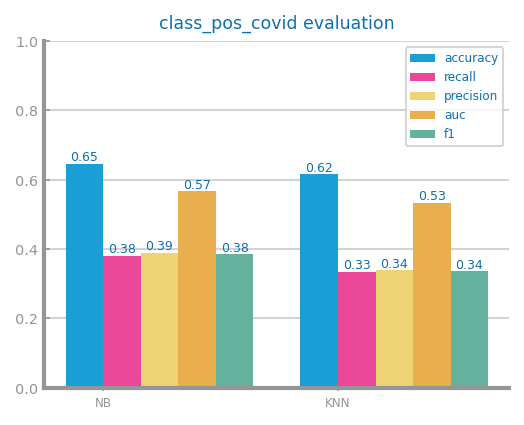

In [8]:
import pandas as pd
target = 'CovidPos'
X, y = df.loc[:, df.columns != 'CovidPos'], df['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

train = pd.concat([Xtrain, Ytrain], axis=1)
test = pd.concat([Xtest, Ytest], axis=1)

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"images/{file_tag}/data_preparation/missing_values/eval_approach1.png")
show()

df.to_csv(f"data/{file_tag}/data_preparation/missing_values/eval_approach1.csv", index=False)

### MVI SECOND APPROACH - dropping variables with >10% mv and records with >90% mv then imputing with median

In [9]:
df: DataFrame = mvi_by_dropping(data, min_pct_per_variable=0.90, min_pct_per_record=0.9)
print(df.shape)

# change to mean
df: DataFrame = mvi_by_filling(df, strategy="frequent")
df.head()

(375892, 40)


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State,GeneralHealth,LastCheckupTime,RemovedTeeth,...,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
0,0.0,0.0,8.0,1.70,81.19,27.44,Alabama,Very good,Within past year (anytime less than 12 months ...,None of them,...,No,No,No,No,No,No,Yes,No,No,No
1,0.0,0.0,6.0,1.60,68.04,26.57,Alabama,Excellent,Within past year (anytime less than 12 months ...,None of them,...,No,No,No,No,No,No,No,No,No,No
2,0.0,0.0,7.0,1.65,63.50,23.30,Alabama,Excellent,Within past year (anytime less than 12 months ...,None of them,...,No,No,No,Yes,No,No,Yes,Yes,No,No
3,2.0,0.0,9.0,1.57,53.98,21.77,Alabama,Fair,Within past year (anytime less than 12 months ...,None of them,...,No,No,No,Yes,Yes,No,No,Yes,No,No
4,1.0,0.0,7.0,1.80,84.82,26.08,Alabama,Poor,Within past year (anytime less than 12 months ...,None of them,...,No,No,No,No,No,No,No,Yes,No,No


In [10]:
# apply encoding
df: DataFrame = df.replace(encoding, inplace=False)
apply_encoding(df)
#df

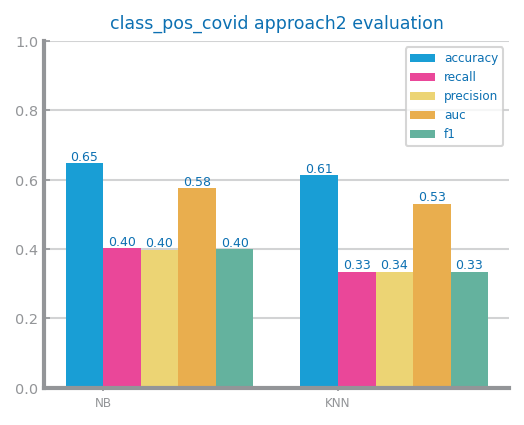

In [11]:
target = 'CovidPos'
X, y = df.loc[:, df.columns != 'CovidPos'], df['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

train = pd.concat([Xtrain, Ytrain], axis=1)
test = pd.concat([Xtest, Ytest], axis=1)

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} approach2 evaluation", percentage=True
)
savefig(f"images/{file_tag}/data_preparation/missing_values/eval_approach2.png")
show()

df.to_csv(f"data/{file_tag}/data_preparation/missing_values/eval_approach2.csv", index=False)

### DROP OUTLIERS

In [12]:
print(og_num_vars)

['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']


In [13]:
from pandas import read_csv, DataFrame, Series
from dslab_functions import NR_STDEV, get_variable_types, determine_outlier_thresholds_for_var

file_tag = "class_pos_covid"
#data = df.copy(deep=True)
data : DataFrame = read_csv('data/class_pos_covid/data_preparation/missing_values/eval_approach2.csv')
print(f"Original data: {data.shape}")

n_std: int = NR_STDEV
#numeric_vars: list[str] = get_variable_types(data)["numeric"]
print(f"Numeric variables: {og_num_vars}")
if og_num_vars is not None:
    df: DataFrame = data.copy(deep=True)
    summary5: DataFrame = data[og_num_vars].describe()
    for var in og_num_vars:
        print("var", var)
        top_threshold, bottom_threshold = determine_outlier_thresholds_for_var(
            summary5[var], True, 4
        )
        outliers: Series = df[(df[var] > top_threshold) | (df[var] < bottom_threshold)]
        df.drop(outliers.index, axis=0, inplace=True)
    df.to_csv(f"data/{file_tag}/data_preparation/outliers/drop_outliers.csv", index=False)
    print(f"Data after dropping outliers: {df.shape}")
else:
    print("There are no numeric variables")

df.describe()

Original data: (375892, 40)
Numeric variables: ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']
var PhysicalHealthDays
var MentalHealthDays
var SleepHours
var HeightInMeters
var WeightInKilograms
var BMI
Data after dropping outliers: (371412, 40)


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State,GeneralHealth,LastCheckupTime,RemovedTeeth,...,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
count,371412.000000,371412.000000,371412.000000,371412.000000,371412.000000,371412.000000,371412.000000,371412.000000,371412.000000,371412.000000,...,371412.000000,371412.000000,371412.000000,371412.000000,371412.000000,371412.000000,371412.000000,371412.000000,371412.000000,371412.000000
mean,4.217082,4.284611,7.009889,1.702903,82.659918,28.345150,74.020891,3.438917,3.665870,3.325590,...,0.159529,0.038165,0.075496,0.411834,0.531655,0.323974,0.529076,0.385138,0.043351,0.291784
std,8.585210,8.280693,1.349460,0.104853,19.858079,5.935091,20.147735,1.045195,0.769288,0.879477,...,0.366169,0.191595,0.264190,0.492166,0.498998,0.467991,0.499155,0.486629,0.203646,0.454584
min,0.000000,0.000000,2.000000,1.300000,22.680000,12.020000,31.429000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.330000,62.446000,3.000000,4.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,7.000000,1.700000,81.190000,27.440000,71.729000,3.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,4.000000,8.000000,1.780000,92.990000,31.320000,82.126000,4.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,30.000000,30.000000,12.000000,2.110000,166.920000,54.030000,242.853000,5.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


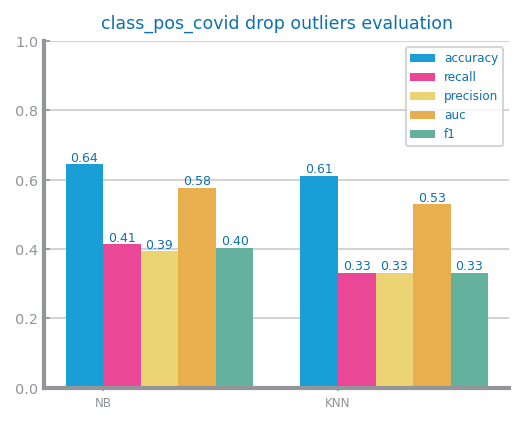

In [14]:
import pandas as pd
target = 'CovidPos'
X, y = df.loc[:, df.columns != 'CovidPos'], df['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

train = pd.concat([Xtrain, Ytrain], axis=1)
test = pd.concat([Xtest, Ytest], axis=1)

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} drop outliers evaluation", percentage=True
)
savefig(f"images/{file_tag}/data_preparation/outliers/drop_outliers_eval_approach1.png")
show()

### REPLACING OUTLIERS WITH FIXED VALUES

In [15]:
file_tag = "class_pos_covid"
data : DataFrame = read_csv('data/class_pos_covid/data_preparation/missing_values/eval_approach2.csv')
print(f"Original data: {data.shape}")

if [] != og_num_vars:
    df: DataFrame = data.copy(deep=True)
    for var in og_num_vars:
        print(var)
        top, bottom = determine_outlier_thresholds_for_var(summary5[var],True, 4)
        median: float = df[var].median()
        df[var] = df[var].apply(lambda x: median if x > top or x < bottom else x)
    df.to_csv(f"data/{file_tag}/data_preparation/outliers/replacing_outliers.csv", index=False)
    print("Data after replacing outliers:", df.shape)
    print(df.describe())
else:
    print("There are no numeric variables")

Original data: (375892, 40)
PhysicalHealthDays
MentalHealthDays
SleepHours
HeightInMeters
WeightInKilograms
BMI
Data after replacing outliers: (375892, 40)
       PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       375892.000000     375892.000000  375892.000000   375892.000000   
mean             4.280418          4.333827       7.007704        1.702933   
std              8.655276          8.337936       1.348218        0.105041   
min              0.000000          0.000000       2.000000        1.300000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          4.000000       8.000000        1.780000   
max             30.000000         30.000000      12.000000        2.110000   

       WeightInKilograms            BMI          State  GeneralHealth  \
count      375892.000000  375892.000000  375892.000000  375892.00000

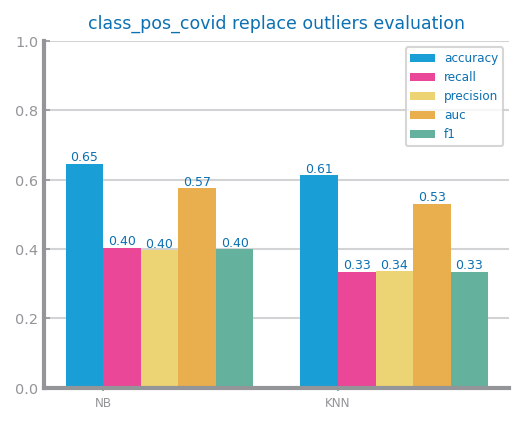

In [16]:
target = 'CovidPos'
X, y = df.loc[:, df.columns != 'CovidPos'], df['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

train = pd.concat([Xtrain, Ytrain], axis=1)
test = pd.concat([Xtest, Ytest], axis=1)

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} replace outliers evaluation", percentage=True
)
savefig(f"images/{file_tag}/data_preparation/outliers/replacing_outliers_eval_approach2.png")
show()

### TRUNCATING OUTLIERS

In [17]:
file_tag = "class_pos_covid"
data : DataFrame = read_csv('data/class_pos_covid/data_preparation/missing_values/eval_approach2.csv')
print(f"Original data: {data.shape}")

if [] != og_num_vars:
    df: DataFrame = data.copy(deep=True)
    for var in og_num_vars:
        print(var)
        top, bottom = determine_outlier_thresholds_for_var(summary5[var], True, 4)
        df[var] = df[var].apply(
            lambda x: top if x > top else bottom if x < bottom else x
        )
    df.to_csv(f"data/{file_tag}/data_preparation/outliers/truncate_outliers.csv", index=False)
    print("Data after truncating outliers:", df.shape)
    print(df.describe())
else:
    print("There are no numeric variables")

Original data: (375892, 40)
PhysicalHealthDays
MentalHealthDays
SleepHours
HeightInMeters
WeightInKilograms
BMI
Data after truncating outliers: (375892, 40)
       PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       375892.000000     375892.000000  375892.000000   375892.000000   
mean             4.280418          4.333827       7.013206        1.702743   
std              8.655276          8.337936       1.419870        0.105716   
min              0.000000          0.000000       1.101915        1.277771   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          4.000000       8.000000        1.780000   
max             30.000000         30.000000      12.944252        2.127567   

       WeightInKilograms            BMI          State  GeneralHealth  \
count      375892.000000  375892.000000  375892.000000  375892.0000

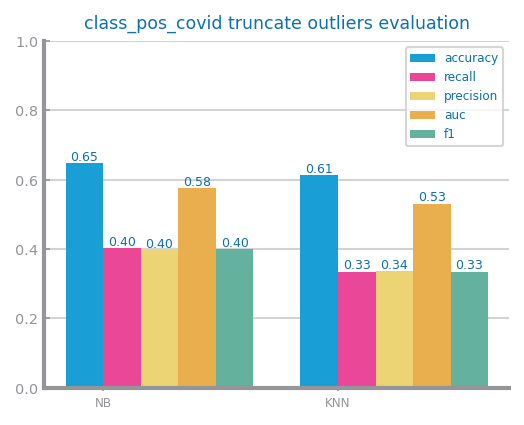

In [18]:
target = 'CovidPos'
X, y = df.loc[:, df.columns != 'CovidPos'], df['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

train = pd.concat([Xtrain, Ytrain], axis=1)
test = pd.concat([Xtest, Ytest], axis=1)

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} truncate outliers evaluation", percentage=True
)
savefig(f"images/{file_tag}/data_preparation/outliers/truncate_outliers_eval_approach3.png")
show()

# SCALING

### Z-SCORE

In [19]:
from pandas import read_csv, DataFrame, Series
from sklearn.preprocessing import StandardScaler

file = "class_pos_covid"
data : DataFrame = read_csv('data/class_pos_covid/data_preparation/outliers/drop_outliers.csv')

target = "CovidPos"
vars: list[str] = data.columns.to_list()
target_data: Series = data.pop(target)

transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(data)
df_zscore = DataFrame(transf.transform(data), index=data.index)
df_zscore[target] = target_data
df_zscore.columns = vars
df_zscore.to_csv(f"data/{file}/data_preparation/scaling/zscore.csv", index=False)

In [21]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State,GeneralHealth,LastCheckupTime,RemovedTeeth,...,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
count,375892.000000,375892.000000,375892.000000,375892.000000,375892.000000,375892.000000,375892.000000,375892.000000,375892.000000,375892.000000,...,375892.000000,375892.000000,375892.000000,375892.000000,375892.000000,375892.000000,375892.000000,375892.000000,375892.000000,375892.000000
mean,4.280418,4.333827,7.013206,1.702743,83.078137,28.491207,74.017930,3.430070,3.666125,3.322659,...,0.162712,0.039767,0.077562,0.413089,0.529931,0.324439,0.528543,0.384991,0.043512,0.292001
std,8.655276,8.337936,1.419870,0.105716,20.637751,6.216995,20.166313,1.049839,0.769221,0.881210,...,0.369103,0.195411,0.267482,0.492389,0.499104,0.468165,0.499185,0.486594,0.204008,0.454684
min,0.000000,0.000000,1.101915,1.277771,22.680000,12.020000,31.429000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.370000,62.446000,3.000000,4.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,7.000000,1.700000,81.190000,27.440000,71.729000,3.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,4.000000,8.000000,1.780000,93.440000,31.430000,82.126000,4.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,30.000000,30.000000,12.944252,2.127567,167.054079,54.033445,242.853000,5.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


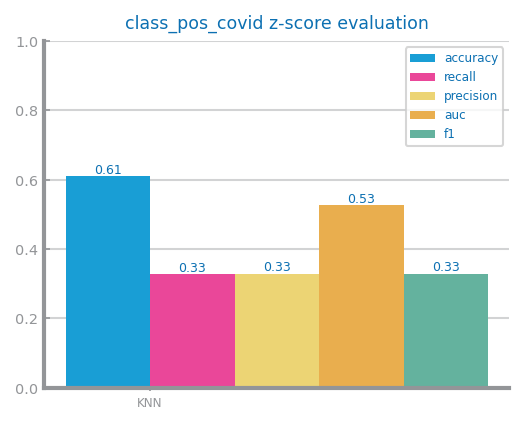

In [22]:
def evaluate_knn(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    #eval_NB: dict[str, float] | None = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] | None = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = eval_KNN[met]
    return eval


target = 'CovidPos'
X, y = df_zscore.loc[:, df_zscore.columns != 'CovidPos'], df_zscore['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

train = pd.concat([Xtrain, Ytrain], axis=1)
test = pd.concat([Xtest, Ytest], axis=1)

figure()
eval: dict[str, list] = evaluate_knn(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["KNN"], eval, title=f"{file_tag} z-score evaluation", percentage=True
)
savefig(f"images/{file_tag}/data_preparation/scaling/zscore.png")
show()

### MINMAX SCALER

In [23]:
from sklearn.preprocessing import MinMaxScaler

file = "class_pos_covid"
data : DataFrame = read_csv('data/class_pos_covid/data_preparation/outliers/replacing_outliers.csv')

target = "CovidPos"
vars: list[str] = data.columns.to_list()
target_data: Series = data.pop(target)

transf: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(data)
df_minmax = DataFrame(transf.transform(data), index=data.index)
df_minmax[target] = target_data
df_minmax.columns = vars
df_minmax.to_csv(f"data/{file}/data_preparation/scaling/minmax.csv", index=False)

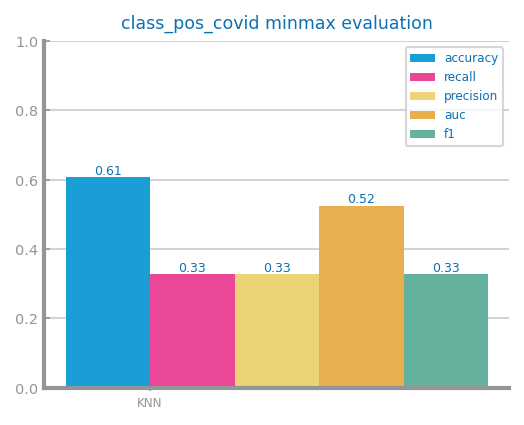

In [24]:
def evaluate_knn(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    #eval_NB: dict[str, float] | None = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] | None = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = eval_KNN[met]
    return eval

target = 'CovidPos'
X, y = df_minmax.loc[:, df_minmax.columns != 'CovidPos'], df_minmax['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

train = pd.concat([Xtrain, Ytrain], axis=1)
test = pd.concat([Xtest, Ytest], axis=1)

figure()
eval: dict[str, list] = evaluate_knn(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["KNN"], eval, title=f"{file_tag} minmax evaluation", percentage=True
)
savefig(f"images/{file_tag}/data_preparation/scaling/minmax.png")
show()

### NO SCALING

In [25]:
from sklearn.preprocessing import MinMaxScaler
import shutil

file = "class_pos_covid"
source_file = 'data/class_pos_covid/data_preparation/outliers/replacing_outliers.csv'
destination_file = 'data/class_pos_covid/data_preparation/scaling/no_scaling.csv'

shutil.copyfile(source_file, destination_file)

data : DataFrame = read_csv(destination_file)
df = data.copy(deep=True)

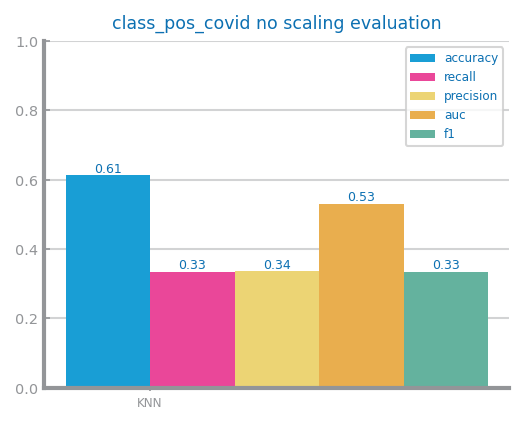

In [26]:
def evaluate_knn(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    #eval_NB: dict[str, float] | None = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] | None = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = eval_KNN[met]
    return eval

target = 'CovidPos'
X, y = df.loc[:, df.columns != 'CovidPos'], df['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

train = pd.concat([Xtrain, Ytrain], axis=1)
test = pd.concat([Xtest, Ytest], axis=1)

figure()
eval: dict[str, list] = evaluate_knn(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["KNN"], eval, title=f"{file_tag} no scaling evaluation", percentage=True
)
savefig(f"images/{file_tag}/data_preparation/scaling/no_scaling.png")
show()

### COMPARE ORIGINAL TO ZSCORE AND MINMAX

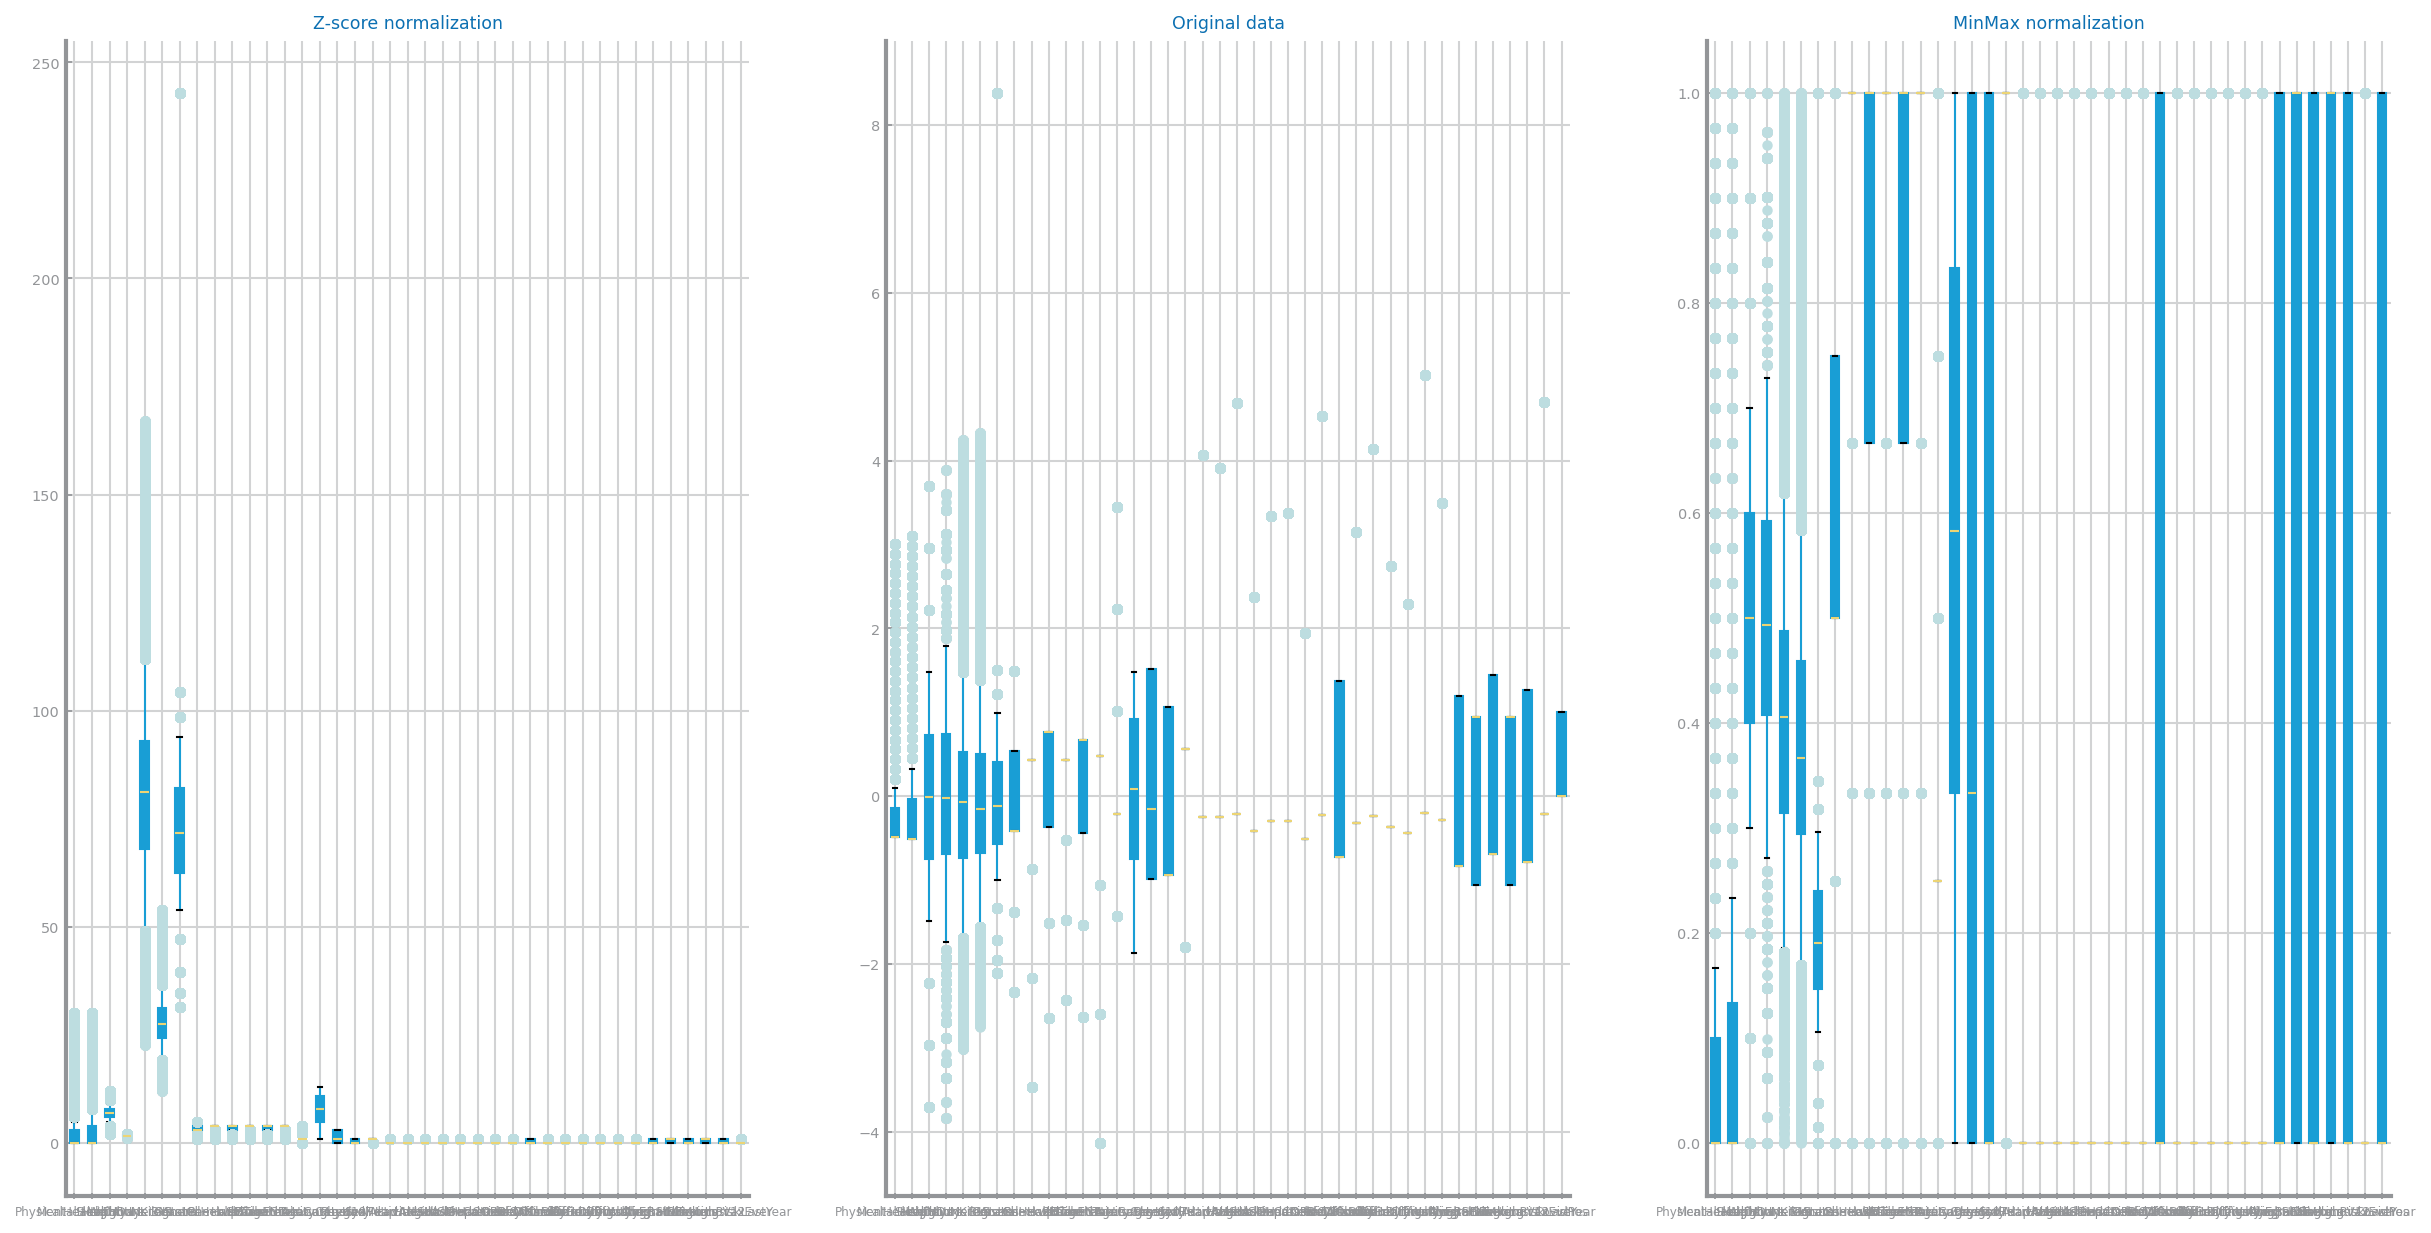

In [27]:
from matplotlib.pyplot import subplots, show

file = "class_pos_covid"
data : DataFrame = read_csv('data/class_pos_covid/data_preparation/outliers/replacing_outliers.csv')

target = "CovidPos"
vars: list[str] = data.columns.to_list()
target_data: Series = data.pop(target)

fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
axs[0, 1].set_title("Original data")
data.boxplot(ax=axs[0, 0])
axs[0, 0].set_title("Z-score normalization")
df_zscore.boxplot(ax=axs[0, 1])
axs[0, 2].set_title("MinMax normalization")
df_minmax.boxplot(ax=axs[0, 2])
show()

# BALANCING

In [5]:
from pandas import read_csv, concat, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslab_functions import plot_bar_chart, study_variance_for_feature_selection, study_redundancy_for_feature_selection
import pandas as pd

file = "class_pos_covid"
target = "CovidPos"
original: DataFrame = read_csv('data/class_pos_covid/data_preparation/scaling/no_scaling.csv')

## drop BMI column
'''
columns = ['BMI']
existing_columns = [col for col in columns if col in original.columns]
if len(existing_columns) > 0:
    original.drop(columns = existing_columns, inplace = True)
'''

X, y = original.loc[:, original.columns != 'CovidPos'], original['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

train = pd.concat([Xtrain, Ytrain], axis=1)
test = pd.concat([Xtest, Ytest], axis=1)

In [12]:
from dslab_functions import select_low_variance_variables
train2 = train.copy(deep=True)
lowvar_vars = select_low_variance_variables(train2, 0.05, target)
print(lowvar_vars)

['HeightInMeters', 'HadStroke', 'HadKidneyDisease', 'DifficultyDressingBathing', 'HighRiskLastYear']


{'NB': [0.4096132596685083,
  0.30251381215469614,
  0.29972375690607733,
  0.2986740331491713,
  0.28997237569060774,
  0.28997237569060774,
  0.28997237569060774,
  0.28997237569060774,
  0.28875690607734805,
  0.28875690607734805,
  0.28875690607734805,
  0.2885359116022099,
  0.2885359116022099,
  0.28828729281767956,
  0.28828729281767956,
  0.2877900552486188,
  0.28823204419889503,
  0.28823204419889503,
  0.28823204419889503,
  0.28823204419889503],
 'KNN': [0.3344475138121547,
  0.33433701657458564,
  0.3343922651933702,
  0.33687845303867403,
  0.33588397790055247,
  0.33588397790055247,
  0.33588397790055247,
  0.33588397790055247,
  0.3378453038674033,
  0.3378453038674033,
  0.3378453038674033,
  0.3338950276243094,
  0.3338950276243094,
  0.3351104972375691,
  0.3351104972375691,
  0.3342265193370166,
  0.33,
  0.33,
  0.33,
  0.33]}

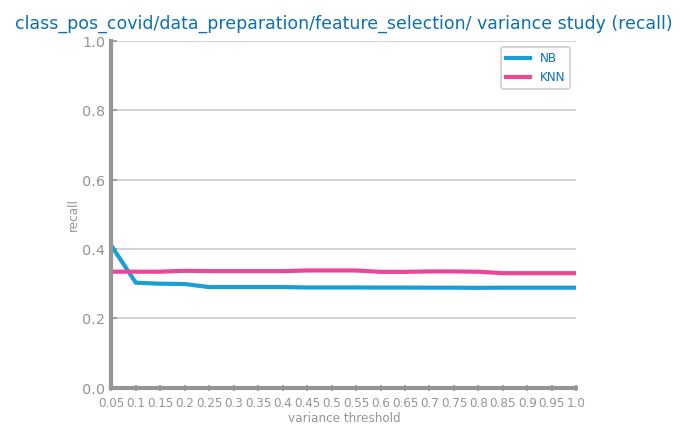

In [9]:
study_variance_for_feature_selection(train, test, "CovidPos", 1, 0.05, "recall", "class_pos_covid/data_preparation/feature_selection/")

In [10]:
from dslab_functions import select_redundant_variables
train3 = train.copy(deep=True)
redudant_vars = select_redundant_variables(train3, 0.9, target)
print(redudant_vars)

[]


{'NB': [0.15569060773480664,
  0.19803867403314918,
  0.3300828729281768,
  0.3822375690607735,
  0.40035911602209945,
  0.40276243093922653,
  0.40276243093922653,
  0.40276243093922653,
  0.40276243093922653,
  0.40276243093922653,
  0.40276243093922653,
  0.40276243093922653,
  0.40276243093922653,
  0.40276243093922653,
  0.40276243093922653,
  0.40276243093922653],
 'KNN': [0.3229281767955801,
  0.315524861878453,
  0.3270718232044199,
  0.3259944751381215,
  0.3337569060773481,
  0.3340331491712707,
  0.3340331491712707,
  0.3340331491712707,
  0.3340331491712707,
  0.3340331491712707,
  0.3340331491712707,
  0.3340331491712707,
  0.3340331491712707,
  0.3340331491712707,
  0.3340331491712707,
  0.3340331491712707]}

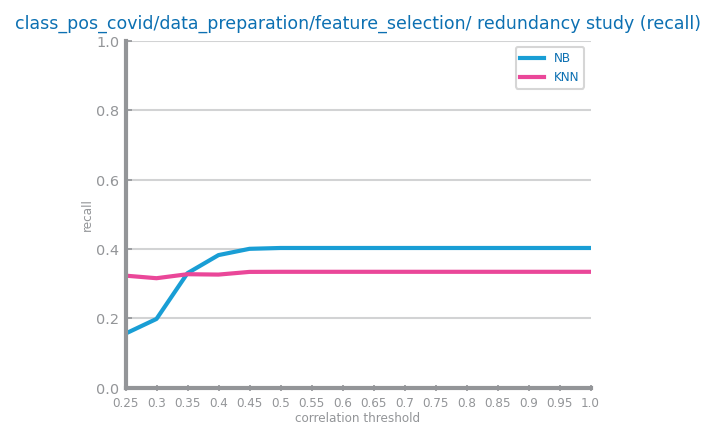

In [11]:
study_redundancy_for_feature_selection(train, test, "CovidPos", 0.25, 0.05, "recall", "class_pos_covid/data_preparation/feature_selection/")

Minority class= 1 : 109761
Majority class= 0 : 266131
Proportion: 0.41 : 1


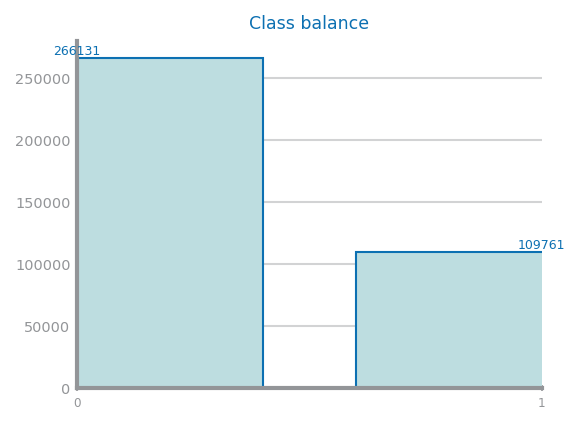

In [34]:
target_count: Series = original[target].value_counts()
positive_class = target_count.idxmin()
negative_class = target_count.idxmax()

print("Minority class=", positive_class, ":", target_count[positive_class])
print("Majority class=", negative_class, ":", target_count[negative_class])
print(
    "Proportion:",
    round(target_count[positive_class] / target_count[negative_class], 2),
    ": 1",
)
values: dict[str, list] = {
    "Original": [target_count[positive_class], target_count[negative_class]]
}

figure()
plot_bar_chart(target_count.index.to_list(), target_count.to_list(), title="Class balance")
show()

In [35]:
df_positives: Series = original[original[target] == positive_class]
df_negatives: Series = original[original[target] == negative_class]

### UNDERSAMPLING

In [36]:
df_neg_sample: DataFrame = DataFrame(df_negatives.sample(len(df_positives)))
df_under: DataFrame = concat([df_positives, df_neg_sample], axis=0)
df_under.to_csv(f"data/{file}/data_preparation/balancing/undersampling.csv", index=False)

print("Minority class=", positive_class, ":", len(df_positives))
print("Majority class=", negative_class, ":", len(df_neg_sample))
print("Proportion:", round(len(df_positives) / len(df_neg_sample), 2), ": 1")

Minority class= 1 : 109761
Majority class= 0 : 109761
Proportion: 1.0 : 1


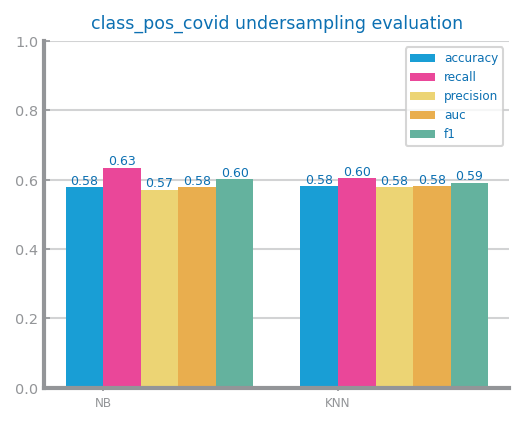

In [37]:
target = 'CovidPos'
X, y = df_under.loc[:, df_under.columns != 'CovidPos'], df_under['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

train = pd.concat([Xtrain, Ytrain], axis=1)
test = pd.concat([Xtest, Ytest], axis=1)

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} undersampling evaluation", percentage=True
)
savefig(f"images/{file_tag}/data_preparation/balancing/undersampling.png")
show()

### OVERSAMPLING

In [38]:
df_pos_sample: DataFrame = DataFrame(
    df_positives.sample(len(df_negatives), replace=True)
)
df_over: DataFrame = concat([df_pos_sample, df_negatives], axis=0)
df_over.to_csv(f"data/{file}/data_preparation/balancing/oversampling.csv", index=False)

print("Minority class=", positive_class, ":", len(df_pos_sample))
print("Majority class=", negative_class, ":", len(df_negatives))
print("Proportion:", round(len(df_pos_sample) / len(df_negatives), 2), ": 1")

Minority class= 1 : 266131
Majority class= 0 : 266131
Proportion: 1.0 : 1


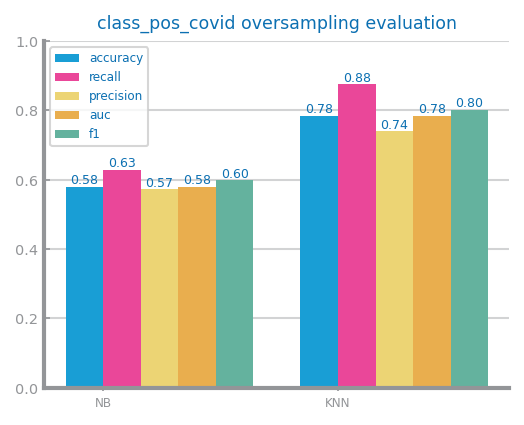

In [39]:
target = 'CovidPos'
X, y = df_over.loc[:, df_over.columns != 'CovidPos'], df_over['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

train = pd.concat([Xtrain, Ytrain], axis=1)
test = pd.concat([Xtest, Ytest], axis=1)

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} oversampling evaluation", percentage=True
)
savefig(f"images/{file_tag}/data_preparation/balancing/oversampling.png")
show()

### SMOTE (need encoding first)

In [40]:
from numpy import ndarray
from pandas import Series
from imblearn.over_sampling import SMOTE

RANDOM_STATE = 42

smote: SMOTE = SMOTE(sampling_strategy="minority", random_state=RANDOM_STATE)
y = original.pop(target).values
X: ndarray = original.values
smote_X, smote_y = smote.fit_resample(X, y)
df_smote: DataFrame = concat([DataFrame(smote_X), DataFrame(smote_y)], axis=1)
df_smote.columns = list(original.columns) + [target]
df_smote.to_csv(f"data/{file}/data_preparation/balancing/smote.csv", index=False)

smote_target_count: Series = Series(smote_y).value_counts()
print("Minority class=", positive_class, ":", smote_target_count[positive_class])
print("Majority class=", negative_class, ":", smote_target_count[negative_class])
print(
    "Proportion:",
    round(smote_target_count[positive_class] / smote_target_count[negative_class], 2),
    ": 1",
)
print(df_smote.shape)

Minority class= 1 : 266131
Majority class= 0 : 266131
Proportion: 1.0 : 1
(532262, 39)


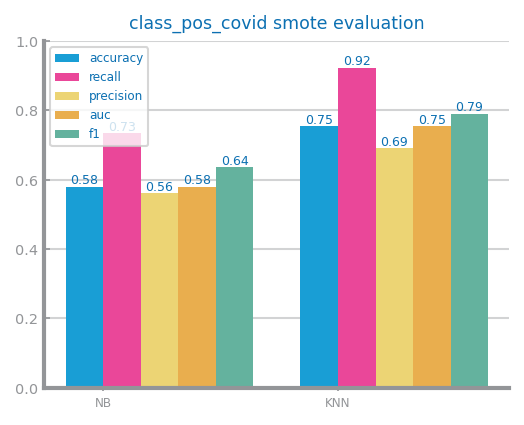

In [41]:
target = 'CovidPos'
X, y = df_smote.loc[:, df_smote.columns != 'CovidPos'], df_smote['CovidPos']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.33, random_state=1)

train = pd.concat([Xtrain, Ytrain], axis=1)
test = pd.concat([Xtest, Ytest], axis=1)

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} smote evaluation", percentage=True
)
savefig(f"images/{file_tag}/data_preparation/balancing/smote.png")
show()